### Lab 3 Overview
#### Consultation time has been updated to Wed 7:15pm - 7:45pm
#### Tutorial starts at 5:20pm (5mins after 5:15pm)
#### First Half
- Using `git` on the VM
- Ways of quick plotting dataframes
- Histograms
- Some ways to determine bin sizes

#### Second Half
- The importance of reading documentation and learning how to search answers up
- *Questions?*
- *Industry techniques and basic procedures?*

-------------------------

### Using `git` on the VM
- https://mast30034.science.unimelb.edu.au/

#### Cloning:
1. Open a terminal (yes it is commandline `git` for this to work)  
2. `git clone HTTPS` (where HTTPS is the https url to your gitlab repo)
3. Enter your credentials
4. Done

#### Pushing:
1. Change directories to inside your repository (`cd NAME_OF_REPO_FOLDER`)
2. `git add .` (this will add all files in the current directory to a commit - you can specify specific files if you would like instead)
3. `git commit` (make it a commit)
4. Enter commit description and press `ctrl+x` to save, `y` to confirm saving
5. `git push`
6. Enter your credentials
7. Done

-----------------

###  Descriptive Statistics
- Hopefully nothing *theoretical* here is *new* to you...
- This tutorial is more about efficiently getting there and some food for thought

### General things
- Keep in mind that if your work now on visualisation is planned ahead, your work in the next two projects will be much easier
- Generally, work with attributes which have some form of correlation or interesting data that you can join with external data to draw new conclusions
- Consider how you might go about predicting said attributes...

In [1]:
import pandas as pd
import feather
import seaborn as sns
import matplotlib.pyplot as plt

# read in the data
df = pd.read_feather("../Data/Lab1/sample.feather").dropna().drop('index', axis=1)

# describe our data
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickupX,pickupY,dropoffX,dropoffY
count,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,9.819500e+04,9.819500e+04,9.819500e+04,9.819500e+04
mean,1.532654,1.709079,2.821277,-73.975085,40.749306,1.020958,-73.976504,40.750403,1.338530,12.660125,0.605795,0.499119,1.790711,0.230021,0.299771,16.085542,-8.234869e+06,4.975435e+06,-8.235027e+06,4.975597e+06
std,0.498935,1.308925,3.330308,0.037463,0.026843,0.188657,0.028106,0.031279,0.486602,9.427668,0.226626,0.024444,2.218994,1.131172,0.011366,11.412770,4.170389e+03,3.943435e+03,3.128708e+03,4.595988e+03
min,1.000000,0.000000,0.000000,-74.084488,40.583759,1.000000,-74.215378,40.523975,1.000000,-80.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-80.300000,-8.247047e+06,4.951139e+06,-8.261618e+06,4.942380e+06
25%,1.000000,1.000000,1.040000,-73.992615,40.735245,1.000000,-73.991871,40.732176,1.000000,7.000000,0.500000,0.500000,0.000000,0.000000,0.300000,9.300000,-8.236820e+06,4.973368e+06,-8.236737e+06,4.972918e+06
50%,2.000000,1.000000,1.710000,-73.982658,40.751526,1.000000,-73.981621,40.750919,1.000000,10.000000,0.500000,0.500000,1.460000,0.000000,0.300000,12.800000,-8.235712e+06,4.975761e+06,-8.235596e+06,4.975671e+06
75%,2.000000,2.000000,3.100000,-73.970203,40.766073,1.000000,-73.965614,40.769094,2.000000,15.000000,0.500000,0.500000,2.550000,0.000000,0.300000,18.360000,-8.234325e+06,4.977899e+06,-8.233815e+06,4.978343e+06
max,2.000000,6.000000,91.200000,-73.674927,40.879520,5.000000,-73.606102,41.007378,4.000000,500.000000,1.500000,0.500000,115.000000,24.000000,0.300000,550.300000,-8.201455e+06,4.994587e+06,-8.193794e+06,5.013430e+06


- Remember that not all the data should be interpreted as purely numerical...
- There may be conclusions you can draw *by coincidence* if you incorrectly assume data types!
- For example:
    - `longitude` and `latitude` should be interpreted as geospatial coordinates
    - `payment_type` is a discrete category of payment types
    - `trip_distance` is non-linear (not a straight line from A to B), but we have no further data on it
- Refer to the data dictionary provided on the TLC website

### Scatterplot plots for Fare / Distance

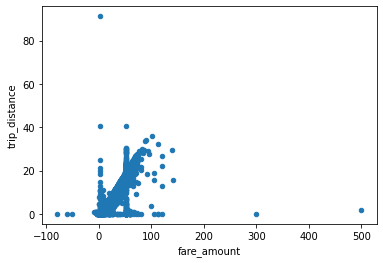

In [2]:
df[['fare_amount', 'trip_distance']].plot.scatter(x='fare_amount',
                                                  y='trip_distance')

plt.show()

General inference:
- We can visually see that the relationship is relatively linear as you'd expect (more distance = more money)
- A fair number of outliers, notably around the 0 distance axis and 0 cost axis...
- Negative values?? *Why, I'll leave it up to you to research up on it...*

### Histogram plots for Trip Distance

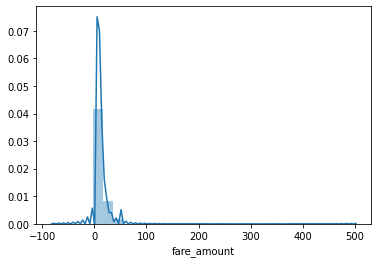

In [3]:
from numpy import log, sqrt

# apply a log transformation for all x non-zero x points, else 0
sns.distplot(df['fare_amount'], bins=30)

plt.show()

- I guess we can kind of see most fares are between 0 - 100
- Hard to tell where the main distribution is spread around 

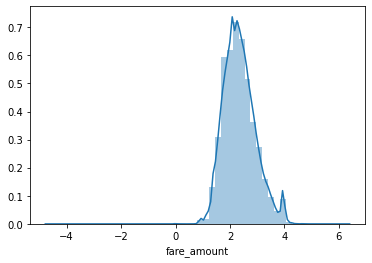

In [13]:
# apply a log transformation for all x non-zero x points, else 0
def logify(x):
    return log(x) if x else 0

sns.distplot(df['fare_amount'].apply(logify), bins=50)
plt.show()

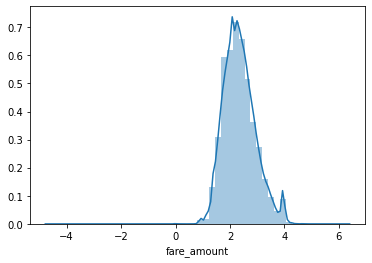

In [12]:
# apply a log transformation for all x non-zero x points, else 0
sns.distplot(df['fare_amount'].apply(lambda x: log(x) if x else 0), bins=50)
plt.show()

- Take a log transformation to visually see the distribution
- Now we see most the values fall under `exp(x)`, majority between `$7` - `$55` (`exp(2)` - `exp(55)`)

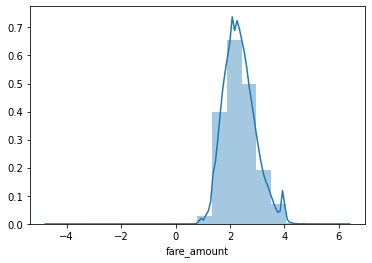

In [14]:
# apply a log transformation for all non-zero x points, else 0
sns.distplot(df.loc[df['fare_amount'] > 0, 'fare_amount'].apply(lambda x: log(x) if x else 0), bins=20)
plt.show()

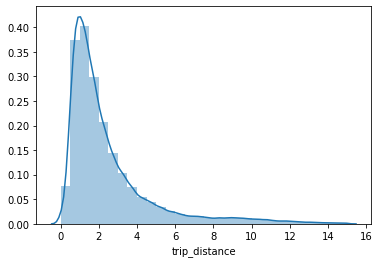

In [15]:
# REVISION: the best syntax for using df.loc is:
# df.loc[CONDITION, COLUMN(s)]
data = df.loc[df['trip_distance'] <= 15, 'trip_distance']

sns.distplot(data, bins=30)
plt.show()

In [16]:
len(data) - len(df)

-2061

Instant insights:
- Distribution is skewed
- Fare distances are predominantly very short, between 1-3km
- There seems to be a fare number of outliers for trips > 15km
- Perhaps we should do a correlation check. Recall that we had negative fares for some reason

In [21]:
# pearson (by default) correlation table for distance and fare amount
df[['trip_distance','fare_amount']].corr(method='pearson')

,trip_distance,fare_amount
trip_distance,1.000000,0.922548
fare_amount,0.922548,1.000000


In [18]:
# correlation table
df.corr()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickupX,pickupY,dropoffX,dropoffY
VendorID,1.000000,0.255434,0.017784,0.015889,0.002392,-0.005973,0.006230,0.003227,-0.015373,0.009334,0.014907,0.001732,0.011374,0.009194,-0.018884,0.011115,0.015889,0.002397,0.006230,0.003230
passenger_count,0.255434,1.000000,0.002791,0.001539,0.000246,-0.008425,-0.012015,0.001379,0.016274,0.004076,-0.003906,0.009178,-0.010094,0.008723,0.002502,0.002213,0.001539,0.000244,-0.012015,0.001374
trip_distance,0.017784,0.002791,1.000000,0.627729,-0.344116,0.396443,0.296985,-0.121316,-0.054209,0.922548,-0.225228,0.009635,0.530393,0.584555,0.014355,0.918708,0.627729,-0.343925,0.296985,-0.121086
pickup_longitude,0.015889,0.001539,0.627729,1.000000,-0.148628,0.398665,0.282294,0.052073,0.019310,0.549669,-0.167951,-0.026853,0.307750,0.480505,-0.004853,0.558125,1.000000,-0.148331,0.282294,0.052144
pickup_latitude,0.002392,0.000246,-0.344116,-0.148628,1.000000,-0.289548,0.086079,0.417507,0.036553,-0.318717,0.179365,0.020445,-0.171573,-0.130846,0.002952,-0.306000,-0.148628,1.000000,0.086079,0.417497
RatecodeID,-0.005973,-0.008425,0.396443,0.398665,-0.289548,1.000000,0.145514,-0.013398,0.009352,0.448186,-0.279332,-0.391286,0.223387,0.311375,-0.046205,0.438094,0.398665,-0.289399,0.145514,-0.013329
dropoff_longitude,0.006230,-0.012015,0.296985,0.282294,0.086079,0.145514,1.000000,0.273058,0.033341,0.273448,-0.047530,-0.042311,0.129589,0.146775,-0.008999,0.264586,0.282294,0.086183,1.000000,0.273232
dropoff_latitude,0.003227,0.001379,-0.121316,0.052073,0.417507,-0.013398,0.273058,1.000000,0.061725,-0.148217,0.047861,0.010228,-0.122946,-0.046102,0.004527,-0.149934,0.052073,0.417579,0.273058,1.000000
payment_type,-0.015373,0.016274,-0.054209,0.019310,0.036553,0.009352,0.033341,0.061725,1.000000,-0.065052,-0.006726,-0.057978,-0.561432,-0.023543,-0.068284,-0.165556,0.019310,0.036575,0.033341,0.061722
fare_amount,0.009334,0.004076,0.922548,0.549669,-0.318717,0.448186,0.273448,-0.148217,-0.065052,1.000000,-0.197513,-0.037649,0.551209,0.530152,0.041001,0.981819,0.549669,-0.318557,0.273448,-0.148005


- Numbers are cool, but lets also do a visualisation.

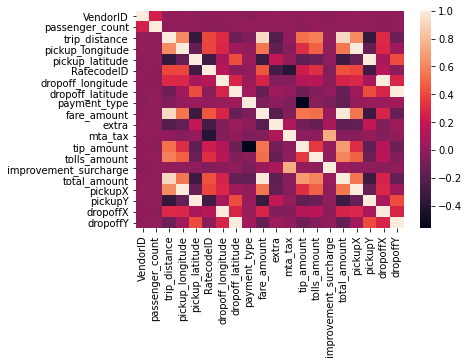

In [19]:
sns.heatmap(df.corr())
# wow that's easy...

plt.show()

Things to take note of:
- trip distance highly correlates with high tips, tolls and overall trip amount
- payment type seems to have some form of negative correlation with tip amount. Gotta be careful as this is a discrete category


In [22]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
PickupCell                object
DropoffCell               object
pickupX                  float64
pickupY                  float64
dropoffX                 float64
dropoffY                 float64
dtype: object

In [23]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'PickupCell', 'DropoffCell',
       'pickupX', 'pickupY', 'dropoffX', 'dropoffY'],
      dtype='object')

In [24]:
TO_STRING = ['VendorID', 'pickup_longitude','pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'PickupCell', 'DropoffCell',
       'pickupX', 'pickupY', 'dropoffX', 'dropoffY']

for col in TO_STRING:
    df[col] = df[col].astype(str)

In [25]:
df.dtypes

VendorID                  object
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude          object
pickup_latitude           object
RatecodeID                object
store_and_fwd_flag        object
dropoff_longitude         object
dropoff_latitude          object
payment_type              object
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
PickupCell                object
DropoffCell               object
pickupX                   object
pickupY                   object
dropoffX                  object
dropoffY                  object
dtype: object

In [26]:
# correlation table
df.corr()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
passenger_count,1.000000,0.002791,0.004076,-0.003906,0.009178,-0.010094,0.008723,0.002502,0.002213
trip_distance,0.002791,1.000000,0.922548,-0.225228,0.009635,0.530393,0.584555,0.014355,0.918708
fare_amount,0.004076,0.922548,1.000000,-0.197513,-0.037649,0.551209,0.530152,0.041001,0.981819
extra,-0.003906,-0.225228,-0.197513,1.000000,0.115174,-0.094058,-0.151964,0.092439,-0.176312
mta_tax,0.009178,0.009635,-0.037649,0.115174,1.000000,-0.015214,-0.001854,0.741541,-0.029075
tip_amount,-0.010094,0.530393,0.551209,-0.094058,-0.015214,1.000000,0.352313,0.015918,0.682799
tolls_amount,0.008723,0.584555,0.530152,-0.151964,-0.001854,0.352313,1.000000,0.004100,0.602536
improvement_surcharge,0.002502,0.014355,0.041001,0.092439,0.741541,0.015918,0.004100,1.000000,0.041790
total_amount,0.002213,0.918708,0.981819,-0.176312,-0.029075,0.682799,0.602536,0.041790,1.000000


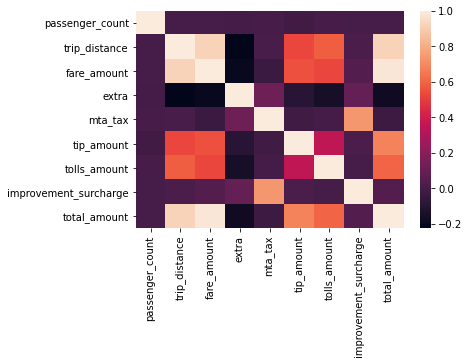

In [27]:
sns.heatmap(df.corr())
plt.show()

If you're interested in calculating correlation between nominal and continuous data, here's a great explanation.   
Link: https://stats.stackexchange.com/questions/119835/correlation-between-a-nominal-iv-and-a-continuous-dv-variable/124618#124618

Remember, you need to refer back to the data dictionary as well as the fare page: https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page

You should especially take note of the fare page if you're looking to see how `RatecodeID` plays a role on the fare.

--------------

### Binning Methods
Sturges:  
- $bins = ceil(log_2(n)) + 1$

Rice:
- $bins = 2\times\sqrt[3]{n}$

Scott:
- $bins = \frac{max - min}{3.5\times \frac{SD}{\sqrt[3]{n}}}$

Freedman:
- $bins = \frac{max - min}{2\times \frac{IQR}{\sqrt[3]{n}}}$

Square:
- $bins = \sqrt{n}$

(Source: https://www.answerminer.com/blog/binning-guide-ideal-histogram)

In [28]:
# dataframes method that may be of use
MAX = df['fare_amount'].max()
MIN = df['fare_amount'].min()
SD = df['fare_amount'].std()
IQR = df['fare_amount'].quantile()
N = len(df)

In [29]:
def sturges(x):
    from numpy import log2
    return int(log2(x)) + 1

def rice(x):
    return int(2 * x ** (1/3))

def scott(large, small, sd, x):
    return int((large - small) / (3.5 * (sd/x ** (1/3))))

def freedman(large, small, iqr, x):
    return int((large - small) / (2 * (iqr/x ** (1/3))))
    
def square(x):
    return int(sqrt(x))

# return log(x) if x is non zero else 0
def logify(x):
    return log(x) if x else 0

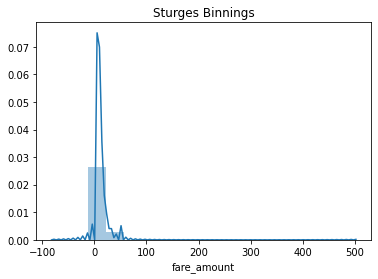

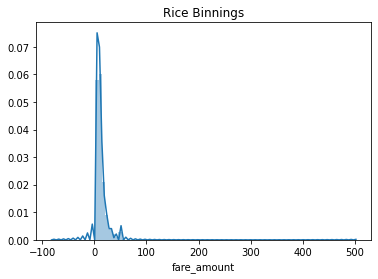

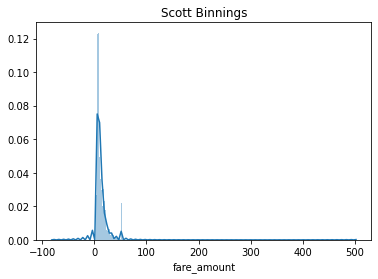

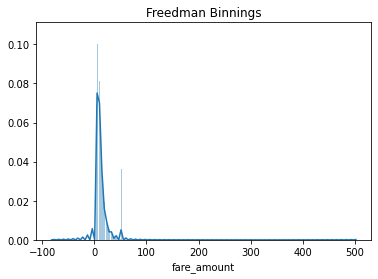

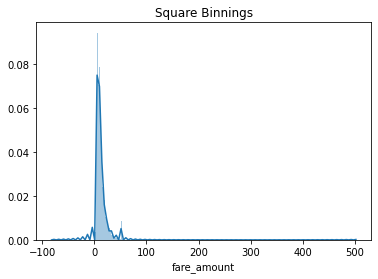

In [30]:
fig1 = sns.distplot(df['fare_amount'], bins=sturges(N))
plt.title("Sturges Binnings")
plt.show()

fig2 = sns.distplot(df['fare_amount'], bins=rice(N))
plt.title("Rice Binnings")
plt.show()

fig3 = sns.distplot(df['fare_amount'], bins=scott(MAX, MIN, SD, N))
plt.title("Scott Binnings")
plt.show()

fig4 = sns.distplot(df['fare_amount'], bins=freedman(MAX, MIN, IQR, N))
plt.title("Freedman Binnings")
plt.show()

fig5 = sns.distplot(df['fare_amount'], bins=square(N))
plt.title("Square Binnings")
plt.show()

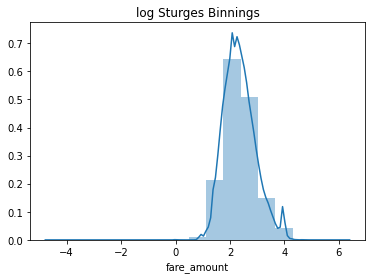

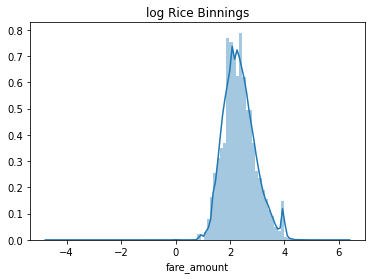

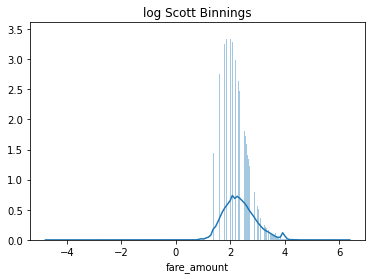

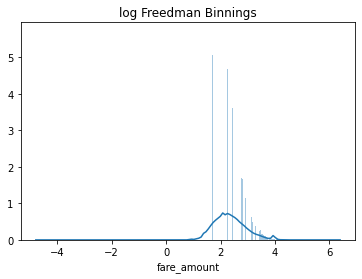

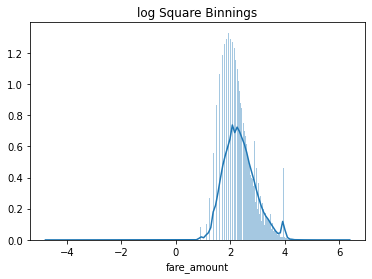

In [31]:
fig1 = sns.distplot(df['fare_amount'].apply(logify), bins=sturges(N))
plt.title("log Sturges Binnings")
plt.show()

fig2 = sns.distplot(df['fare_amount'].apply(logify), bins=rice(N))
plt.title("log Rice Binnings")
plt.show()

fig3 = sns.distplot(df['fare_amount'].apply(logify), bins=scott(MAX, MIN, SD, N))
plt.title("log Scott Binnings")
plt.show()

fig4 = sns.distplot(df['fare_amount'].apply(logify), bins=freedman(MAX, MIN, IQR, N))
plt.title("log Freedman Binnings")
plt.show()

fig5 = sns.distplot(df['fare_amount'].apply(logify), bins=square(N))
plt.title("log Square Binnings")
plt.show()

- Rice's method for binning looks good **for this plot**
- Not always the case, keep that in mind...

### Other plots to consider
You're not just limited to these plots. Consider *newer* plots that you can experiment with:
- Violin Plots
- Box Plots
- Radar Plots
See more on the documentation with `plotly` or `seaborn`

In [35]:
df.loc[df['RatecodeID'] == '2']

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,PickupCell,DropoffCell,pickupX,pickupY,dropoffX,dropoffY
17,1,1/12/15 0:00,1/12/15 0:43,1,21.40,-73.78109741,40.64500046,2,N,-74.00856781,...,8.00,0.00,0.3,60.80,71:60,27:78,-8213274.193850116,4960119.488074172,-8238596.082948659,4968612.705213652
21,1,1/12/15 0:00,1/12/15 0:43,1,19.00,-73.78221893,40.6445961,2,N,-73.98414612,...,5.20,0.00,0.3,58.00,71:60,1.002777778,-8213399.040885431,4960060.163629236,-8235877.472853548,4978468.458016939
47,2,1/12/15 0:00,1/12/15 0:41,5,17.70,-73.7960434,40.64468002,2,N,-74.00257874,...,11.67,5.54,0.3,70.01,69:62,25:72,-8214937.973846318,4960072.475666696,-8237929.382725934,4973319.092303965
52,2,1/12/15 0:00,1/12/15 0:28,1,20.48,-73.78224182,40.64440536,2,N,-73.9887085,...,11.67,5.54,0.3,70.01,71:60,26:68,-8213401.588988574,4960032.179916254,-8236385.354671953,4974749.9464659365
74,2,1/12/15 0:00,1/12/15 0:34,1,20.68,-73.78928375,40.6470108,2,N,-73.97955322,...,13.00,5.54,0.3,71.34,69:61,0.958333333,-8214185.493050376,4960414.434315481,-8235366.193564283,4981230.366590443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98078,1,4/12/15 22:55,4/12/15 23:17,1,15.70,-73.80368805,40.64886093,2,N,-73.97058868,...,11.00,5.54,0.3,69.34,67:62,28:65,-8215788.972391611,4960685.883260701,-8234368.265536288,4975918.100644759
98104,2,4/12/15 22:55,4/12/15 23:23,5,17.81,-73.78346252,40.64863968,2,N,-73.98766327,...,0.00,0.00,0.3,52.80,70:60,29:73,-8213537.476690986,4960653.421319056,-8236269.000200591,4970803.134856424
98124,1,4/12/15 22:55,4/12/15 23:27,1,19.40,-73.77850342,40.64679337,2,Y,-73.95940399,...,11.66,5.54,0.3,70.00,71:59:00,23:55,-8212985.432204194,4960382.533730176,-8233123.191540807,4984303.312567386
98129,2,4/12/15 22:55,4/12/15 23:17,1,6.26,-73.90762329,40.72774124,2,N,-73.99964142,...,0.00,5.54,0.3,58.34,41:62,24:70,-8227358.990383888,4972266.121135079,-8237602.401759237,4974119.96353209
